In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import math

## EVALUACION DEL DATASET

In [ ]:
import graphstuff as gs #lmcanaval

url="https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/data/poblaciones.csv"
poblacionesDF = pd.read_csv(url)

poblacionesDF.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,NMI1,NMI2
0,AMAZONAS,BAGUA,ARAMANGO,EL MUYO (C.P.L.),-5.422545,-78.45299,311,1206
1,AMAZONAS,BAGUA,ARAMANGO,RESERVA UJUCANO,-5.427565,-78.444372,44,129
2,AMAZONAS,BAGUA,ARAMANGO,TUTUMBEROS,-5.327317,-78.44472,49,179
3,AMAZONAS,BAGUA,BAGUA,ALENYA BAJO,-5.682439,-78.495229,3,8
4,AMAZONAS,BONGARA,CUISPES,MITOPAMPA,-5.93856,-77.965302,1,4


In [5]:
#@title Obtener listado de Provincias en total de distritos
provincias = poblacionesDF['PROVINCIA'].unique()
print(len(provincias))
print(provincias)

157
['BAGUA' 'BONGARA' 'CHACHAPOYAS' 'UTCUBAMBA' 'ANTONIO RAYMONDI'
 'BOLOGNESI' 'CARHUAZ' 'CASMA' 'HUARAZ' 'HUARI' 'HUAYLAS' 'OCROS'
 'POMABAMBA' 'RECUAY' 'SANTA' 'SIHUAS' 'YUNGAY' 'ABANCAY' 'ANDAHUAYLAS'
 'ANTABAMBA' 'AYMARAES' 'CHINCHEROS' 'GRAU' 'AREQUIPA' 'CAMANA' 'CARAVELI'
 'CASTILLA' 'CAYLLOMA' 'CONDESUYOS' 'CANGALLO' 'HUAMANGA' 'HUANCA SANCOS'
 'HUANTA' 'LUCANAS' 'PARINACOCHAS' 'VICTOR FAJARDO' 'CAJABAMBA'
 'CAJAMARCA' 'CELENDIN' 'CHOTA' 'CONTUMAZA' 'CUTERVO' 'JAEN' 'SAN IGNACIO'
 'SAN MARCOS' 'SAN MIGUEL' 'SAN MIMGUEL' 'SANTA CRUZ' 'ACOMAYO' 'CALCA'
 'CANAS' 'CANCHIS' 'CHUMBIVILCAS' 'LA CONVENCION' 'PARURO' 'QUISPICANCHI'
 'PROVINCIA' 'CASTROVIRREYNA' 'CHURCAMPA' 'HUANCAVELICA' 'HUAYTARA'
 'TAYACAJA' 'AMBO' 'DOS DE MAYO' 'DOSDEMAYO' 'HUAMALIES' 'HUANUCO SANTA'
 'HUANUCO' 'LAURICOCHA' 'LEONCIO PRADO' 'MARAÑON' 'PUERTO INCA' 'CHINCHA'
 'ICA' 'NASCA' 'PALPA' 'PISCO' 'CHANCHAMAYO' 'CHUPACA' 'CONCEPCION'
 'HUANCAYO' 'JAUJA' 'JUNIN' 'SATIPO' 'TARMA' 'ASCOPE' 'BOLIVAR' 'CHEPEN'
 'GR

In [6]:
#@title Obtener listado de distritos con la cantidad de centros poblados de una provincia
provincia = 'AYMARAES' #@param {type:"string"}

distritos = poblacionesDF[poblacionesDF['PROVINCIA'] == provincia]

nombresDistritos = distritos['DISTRITO'].unique()

for nombre in nombresDistritos:
  print(nombre, len(distritos[distritos['DISTRITO'] == nombre]))


CAPAYA 1
CHAPIMARCA 5
COLCABAMBA 1
HUAYLLO 1
JUSTO APU SAHUARAURA 5
TAPAIRIHUA 2
TINTAY 7
TORAYA 1


## FUNCION PARA LA PREPARACION DEL DATASET

In [7]:
def centros_poblados_distrito(poblacionesDF, provincia, distrito):
    distritos = poblacionesDF[poblacionesDF['PROVINCIA'] == provincia]
    distrito = distritos[distritos['DISTRITO'] == distrito]

    def distancia(origen, destino):
        x1, y1 = float(origen['LATITUD']), float(origen['LONGITUD'])
        x2, y2 = float(destino['LATITUD']), float(destino['LONGITUD'])
        return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

    # Lista de nombres de los distritos
    nombres = [distrito['CENTRO POBLADO'] for _, distrito in distrito.iterrows()]
    # Lista de adyacencia simple
    grafo = [[] for i in range(len(distrito))]
    # Matriz del grafo para calcular los pesos mas facilmente
    matriz = [[0 for j in range(len(distrito))] for i in range(len(distrito))]
    # Grafo para nx
    grafico = nx.Graph()

    for _, origen in distrito.iterrows():
        i = nombres.index(origen['CENTRO POBLADO'])
        for _, destino in distrito.iterrows():
            j = nombres.index(destino['CENTRO POBLADO'])
            if origen['CENTRO POBLADO'] != destino['CENTRO POBLADO']:
                grafo[i].append([j,distancia(origen, destino)])
                matriz[i][j] = distancia(origen, destino)
                grafico.add_edge(origen['CENTRO POBLADO'], destino['CENTRO POBLADO'], weight=distancia(origen, destino))
    
    return nombres, grafo, matriz, grafico


## VISUALIZACION DE LA DATA 

1 | Origen: ANCOBAMBA
  | Destino: CHAUCCA - Distancia: 0.049862895423348486
  | Destino: SANTA ISABEL - Distancia: 0.08300539946291902
  | Destino: SANTA ROSA - Distancia: 0.0825804421034413
  | Destino: SUPALLA - Distancia: 0.04654598889270501
2 | Origen: CHAUCCA
  | Destino: ANCOBAMBA - Distancia: 0.049862895423348486
  | Destino: SANTA ISABEL - Distancia: 0.04523991600345282
  | Destino: SANTA ROSA - Distancia: 0.0422097541570684
  | Destino: SUPALLA - Distancia: 0.003349142278255718
3 | Origen: SANTA ISABEL
  | Destino: ANCOBAMBA - Distancia: 0.08300539946291902
  | Destino: CHAUCCA - Distancia: 0.04523991600345282
  | Destino: SANTA ROSA - Distancia: 0.005371326279416152
  | Destino: SUPALLA - Distancia: 0.04742685899360736
4 | Origen: SANTA ROSA
  | Destino: ANCOBAMBA - Distancia: 0.0825804421034413
  | Destino: CHAUCCA - Distancia: 0.0422097541570684
  | Destino: SANTA ISABEL - Distancia: 0.005371326279416152
  | Destino: SUPALLA - Distancia: 0.04464070362348943
5 | Origen: SUP

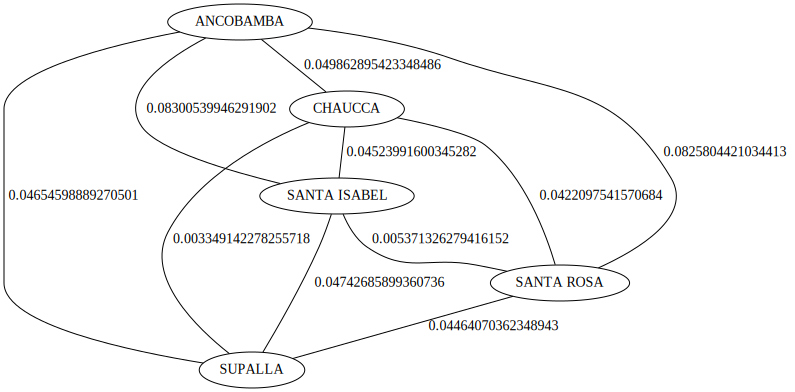

In [8]:
#@title Parámetros 
#@markdown Ingrese la provincia y el distrito

provincia = 'AYMARAES' #@param {type:"string"}
distrito = 'CHAPIMARCA' #@param {type:"string"}

nombres, grafo, matriz, grafico = centros_poblados_distrito(poblacionesDF, provincia, distrito)

for i in range(len(grafo)):
    print(i+1, "| Origen:", nombres[i])
    for j in range(len(grafo[i])):
      print("  | Destino:",nombres[grafo[i][j][0]],"- Distancia:", grafo[i][j][1])

gs.nx2gv(grafico, weighted=True, params={'size':'15'})

## METODO DE FUERZA BRUTA Y BRACKTRACKING - Método más lento pero seguro

In [9]:
def metodo_permutaciones(graph,matrix,start):
    n = len(graph)

    # Funcion para obtener permutaciones utilizando backtracking
    def permutar(permutaciones, a, l, r):
      if l==r:
          permutaciones.append(list(a))
      else:
          for i in range(l, r+1):
              a[l], a[i] = a[i], a[l]
              permutar(permutaciones, a, l+1, r)
              a[l], a[i] = a[i], a[l]

    # Obtener todas las rutas posibles con permutaciones
    answer = []
    permutar(answer,[i for i in range(n)],0,n-1)

    # Reconstruimos la rutas con los pesos
    distancia, ruta = math.inf, []
    for i in range(len(answer)):
        distanciaTotal = 0
        for j in range(len(answer[i])-1):
            distanciaTotal += matrix[answer[i][j]][answer[i][j+1]]
        # Actualizar el minimo peso en total de la ruta
        if distanciaTotal < distancia \
          and answer[i][0] == start: # solo los que empiezan desde Start
            distancia, ruta = distanciaTotal, answer[i]
    
    return ruta, distancia

In [ ]:
origen = 0#@param {type:"integer"}
ruta, distancia = metodo_permutaciones(grafo,matriz,origen)

print("Ruta: ", end = "")
for i in ruta:
    print(i,nombres[i], end=" - ")
print("\nDistancia Total:",distancia)


Ruta: 0 ANCOBAMBA - 4 SUPALLA - 1 CHAUCCA - 3 SANTA ROSA - 2 SANTA ISABEL - 
Distancia Total: 0.09747621160744528


## METODO DE BFS - Método más rápido, pero no tan preciso

In [10]:
def metodo_distancia_menor(graph,matrix,start):
    n = len(graph)
    visitado, noVisitado, ruta = [],[],[]
    
    # Se inserta
    noVisitado.insert(0,[0,start])

    distancia = 0
    while len(noVisitado) > 0:
      u = noVisitado.pop(0) # Se coje el vertice de menor peso
      noVisitado = [] # Se vacea la lista de vertices
      visitado.append(u[1])

      # Se añade a la ruta el vertice siendo explorado
      ruta.append(u[1])
      distancia += u[0]
      
      for v, w in graph[u[1]]:
        if v not in visitado:
          noVisitado.insert(0,[w,v])
          noVisitado.sort() # Se ordena la lista de menor a mayor
    
    return ruta, distancia

In [ ]:
origen = 0#@param {type:"integer"}
ruta, distancia = metodo_distancia_menor(grafo,matriz,origen)

print("Ruta: ", end = "")
for i in ruta:
    print(i, nombres[i], end=" - ")
print("\nDistancia Total:",distancia)

Ruta: 0 ANCOBAMBA - 4 SUPALLA - 1 CHAUCCA - 3 SANTA ROSA - 2 SANTA ISABEL - 
Distancia Total: 0.09747621160744528


## MÉTODO DFS - El más lento pero más seguro cuando se tiene un destino fijo. Utilizable en varios ámbitos

In [12]:
def todos_caminos(graph,matrix,start,end):
    visited = [False for i in range(len(graph))]
    path, answer = [], []
    
    # Implementacion del DFS para explorar cada ruta 
    def DFS(graph, start, end, visited, path, answer):
        visited[start] = True
        path.append(start)
        aux = []

        if start == end:
            aux += path
            # Guardar la ruta solo si visita todos los nodos
            if len(aux) == len(graph):
               answer.append(aux)
        else:
            for v, w in graph[start]:
                if visited[v] == False:
                    DFS(graph, v, end, visited, path, answer)
        path.pop()
        visited[start] = False
    DFS(graph,start,end,visited,path,answer)

    # Reconstruimos la ruta con los pesos
    distancia, ruta = math.inf, []
    for i in range(len(answer)):
        distanciaTotal = 0
        for j in range(len(answer[i])-1):
            distanciaTotal += matrix[answer[i][j]][answer[i][j+1]]
        # Actualizar el minimo peso en total de la ruta
        if distanciaTotal < distancia:
            distancia, ruta = distanciaTotal, answer[i]
    
    return ruta, distancia

In [13]:
origen = 0#@param {type:"integer"}
destino  = 4#@param {type:"integer"}
ruta, distancia = todos_caminos(grafo,matriz,origen,destino)

print("Ruta: ", end = "")
for i in ruta:
    print(i, nombres[i], end=" - ")
print("\nDistancia Total:",distancia)

Ruta: 0 ANCOBAMBA - 2 SANTA ISABEL - 3 SANTA ROSA - 1 CHAUCCA - 4 SUPALLA - 
Distancia Total: 0.1339356221776593
